## Assignment on Linear Regression with user defined functions

- Name: Jahnavi Murali
- Reg No.: 3122 21 5001 038

### Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Loading Data

In [5]:
data = pd.read_csv('train.csv')

# Drop records with null values
data=data.dropna()

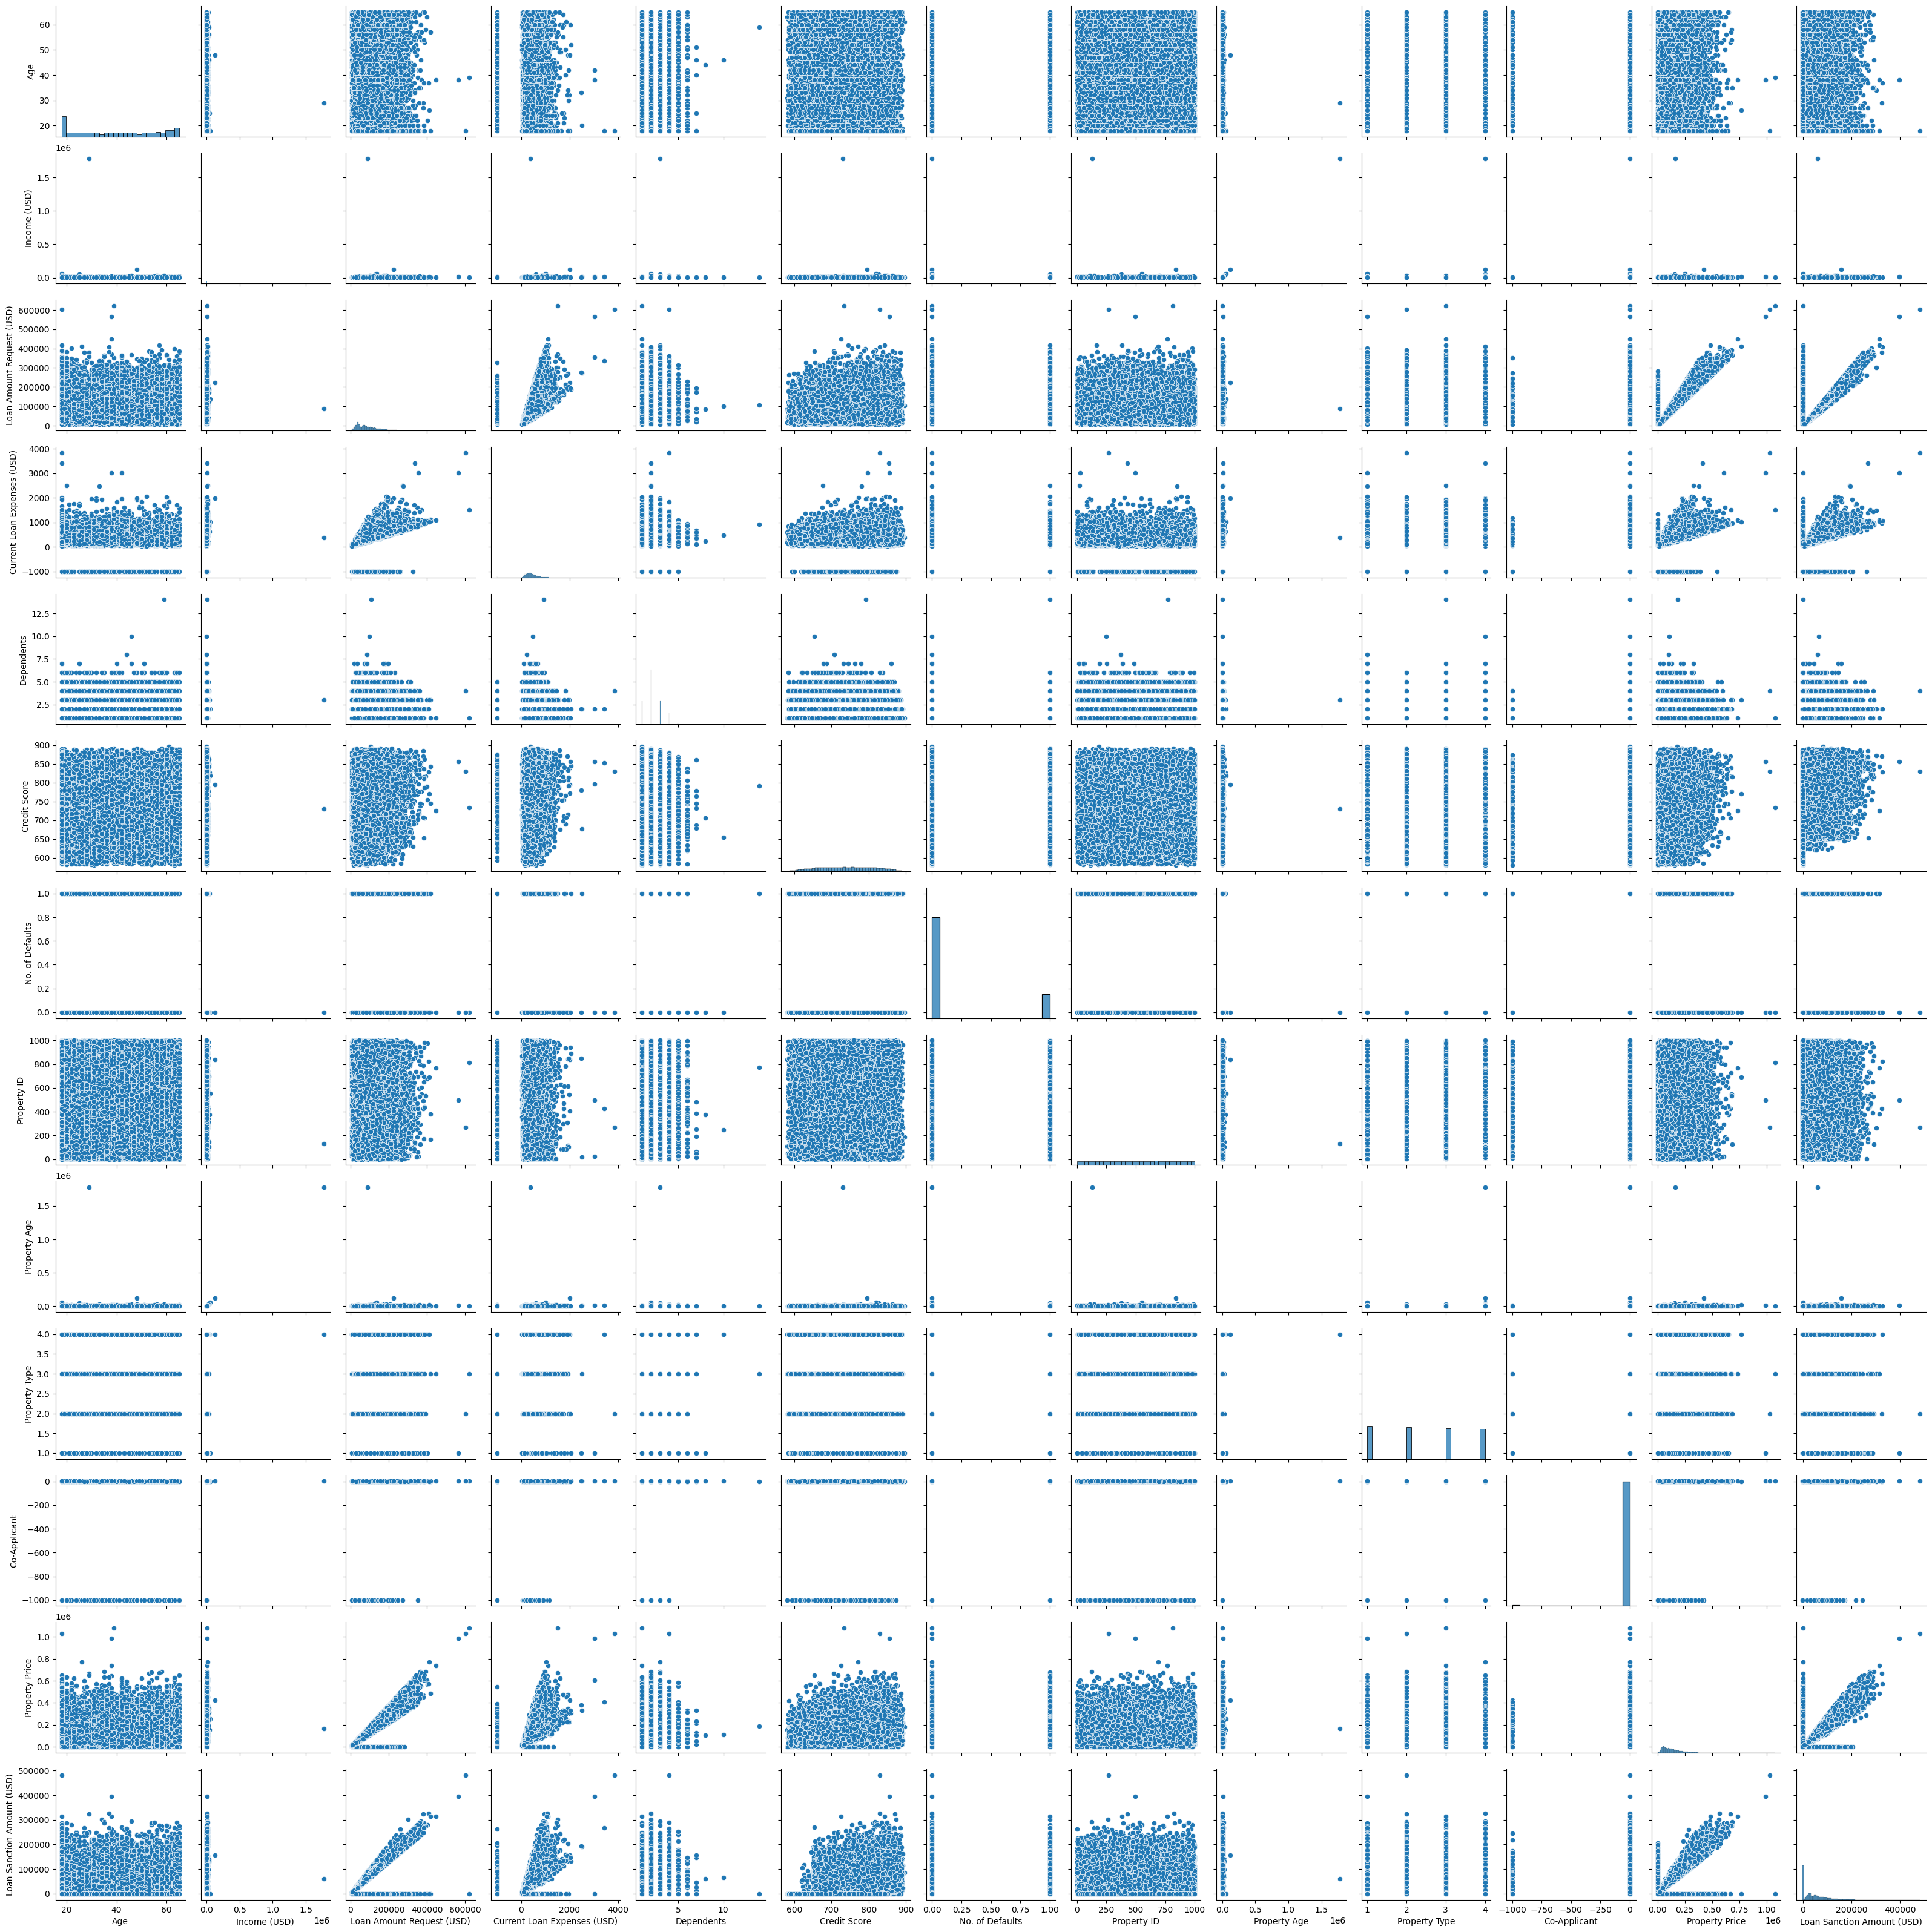

In [6]:
sns.pairplot(data)

In [6]:
data.columns

Index(['Customer ID', 'Name', 'Gender', 'Age', 'Income (USD)',
       'Income Stability', 'Profession', 'Type of Employment', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Property ID',
       'Property Age', 'Property Type', 'Property Location', 'Co-Applicant',
       'Property Price', 'Loan Sanction Amount (USD)'],
      dtype='object')

### Train-Test Split

In [7]:
x=data[['Customer ID', 'Name', 'Gender', 'Age', 'Income (USD)',
       'Income Stability', 'Profession', 'Type of Employment', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Property ID',
       'Property Age', 'Property Type', 'Property Location', 'Co-Applicant',
       'Property Price']]
y=data[['Loan Sanction Amount (USD)']]

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)


In [10]:
# include only numerical variables
x_train=x_train.select_dtypes(include=[np.number])
y_train=y_train.select_dtypes(include=[np.number])
x_test=x_test.select_dtypes(include=[np.number])
y_test=y_test.select_dtypes(include=[np.number])

### Linear Regression

In [11]:
class CustomLinearRegression:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
    
    def fit(self, X, y):
        # Add a column of ones for the intercept term
        X = np.column_stack([np.ones(len(X)), X])
        
        # Calculate coefficients using closed-form solution (normal equation)
        self.coefficients = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        
        # Set coefficients
        self.intercept_ = self.coefficients[0]
        self.coef_ = self.coefficients[1:]
        
    def predict(self, X):
        # Add a column of ones for the intercept term
        X = np.column_stack([np.ones(len(X)), X])
        
        # Calculate predictions
        return X.dot(self.coefficients)


In [13]:
custom_model = CustomLinearRegression()
custom_model.fit(x_train, y_train)

# Print coefficients and intercept
print("Coefficients:", custom_model.coef_)
print("Intercept:", custom_model.intercept_)

# Make predictions
predictions = custom_model.predict(x_test)


Coefficients: [[ 6.57425768e+01]
 [ 1.84723318e+00]
 [ 5.23216345e-01]
 [-5.18796032e+00]
 [-3.46162391e+02]
 [ 1.66636773e+02]
 [-1.74777187e+03]
 [-1.24700058e+00]
 [-1.89217083e+00]
 [ 2.19575515e+01]
 [-1.01549723e+01]
 [-4.54531517e-03]]
Intercept: [-123467.77659295]


In [39]:
predictions = custom_model.predict(x_test)

### Plotting Results

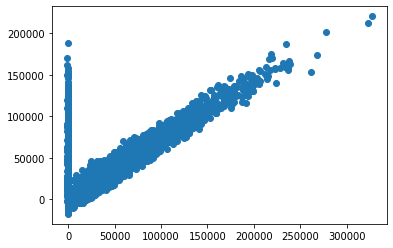

In [14]:
plt.scatter(y_test, predictions)

(array([   3.,   19.,   44.,  157.,  350.,  674., 2150., 1036.,   76.,
           6.]),
 array([-187863.84727792, -158054.23065571, -128244.61403349,
         -98434.99741128,  -68625.38078906,  -38815.76416685,
          -9006.14754463,   20803.46907759,   50613.0856998 ,
          80422.70232202,  110232.31894423]),
 <BarContainer object of 10 artists>)

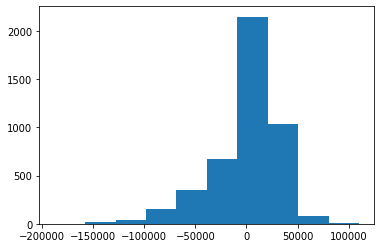

In [15]:
plt.hist(y_test - predictions)

### Results for user defined linear regression model

In [18]:
metrics.mean_absolute_error(y_test, predictions)

24705.202807579182

In [19]:
metrics.mean_squared_error(y_test, predictions)

1121331015.3456674

In [20]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

33486.28100201137

### Inferences

- From the results of custom user built functions for linear regression we can compare it
with the sklearn linear regression in Assignment 2 and we can see that custom built functions perform
more equally as inbuilt functions.

### Learning Objectives

- Understood and implemented the concept of linear regression .
- Understood and implemented user defined custom designed models for linear
regression and compared the results with the built in functions.